In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc

#**S03 T02**#

##*Exercice 1*##

*Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".*

In [31]:
tips = pd.read_csv(r'C:\Users\Pereira\Documents\IT Academy\Repos GitHub\Examining-Data\tips.csv', sep = ',', encoding = 'utf-8')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [107]:
tips.dtypes

total_bill               float64
tip                      float64
sex                       object
smoker                    object
day                       object
time                      object
size                       int64
tip_percentage           float64
total_spent              float64
total_bill_per_person    float64
total_tip_per_person     float64
dtype: object

In [32]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000


Veiem que el count total de totes les variables és 244, això vol dir que no tenim falta d'informació en cap columna.  

Sex: Hi ha 157 homes de 244, això ens deixa un total de 87 dones. Per tant, hi ha un 64'3% d'homes i 35'7% de dones.

Smoker: Hi ha 151 fumadors, això ens deixa un total de 93 no fumadors. Per tant, hi ha un 61'8% de fumadors i un 38'2% de no fumadors.

Day: El dissabte és el dia on s'han comptat més pagaments de comptes.

Time: Hi ha 176 sopars, això ens deixa un total de 68 dinars. Per tant, hi ha un 73'1% de sopars i un 26'9% de dinars.


In [120]:
tip_mode= stats.mode(tips['tip'])
print(tip_mode)
total_bill_mode=stats.mode(tips['total_bill'])
print(total_bill_mode)
print(tips['total_bill'].nunique())
print(tips['tip'].nunique())

ModeResult(mode=array([2.]), count=array([33]))
ModeResult(mode=array([13.42]), count=array([3]))
229
123


Calculem quina és la propina i el compte total més repetits: 2 i 13,42 respectivament. També ens diu que la propina de 2 es repeteix 33 cops i el compte de 13'42, 3 cops.
També calculem quants comptes i propines amb número únic hi ha (que no es repeteixi la quantitat): 229 i 123 respectivament (un 91'3% i  50'4%).

Abans de començar a analitzar, creem noves columnes amb més info. Percentatge de la propina respecte al compte total, el total gastat (compte+propina), total gastat per persona en el compte i en la propina.

In [68]:
tips['tip_percentage'] = round((tips['tip'] / (tips['total_bill']))*100, 2)
tips['total_spent'] = tips['tip'] + tips['total_bill']
tips['total_bill_per_person'] = tips['total_bill'] / tips['size']
tips['total_tip_per_person']= tips['tip'] / tips['size']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,total_spent,total_bill_per_person,total_tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,18.00,8.495000,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,12.00,3.446667,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,24.51,7.003333,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,26.99,11.840000,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,28.20,6.147500,0.902500
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39,34.95,9.676667,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36,29.18,13.590000,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82,24.67,11.335000,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82,19.57,8.910000,0.875000


In [121]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,total_spent,total_bill_per_person,total_tip_per_person
count,244.000,244.000,244,244,244,244,244.000,244.000,244.000,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN,NaN,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,16.080,22.784,7.888,1.213
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,6.107,9.890,2.914,0.492
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.560,4.070,2.875,0.400
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,12.910,15.475,5.802,0.862
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,15.475,20.600,7.255,1.108
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,19.148,27.722,9.390,1.500


In [129]:
round(tips.tip.std(),3)

1.384

Com que la desviació estàndard és bastant baixa, ens indica que els valors de propina solen estar tots aprop de la mitja.  

In [130]:
round(tips.total_bill.std(),3)

8.902

Com que la desviació estàndard és alta, ens indica que els valors de compte total solen estar estesos en un rang ampli de valors.

In [131]:
tips.tip.mean()- tips.tip.std()

1.6146404995234076

In [132]:
tips.total_bill.mean()- tips.total_bill.std()

10.883530668093968

<AxesSubplot:xlabel='day', ylabel='count'>

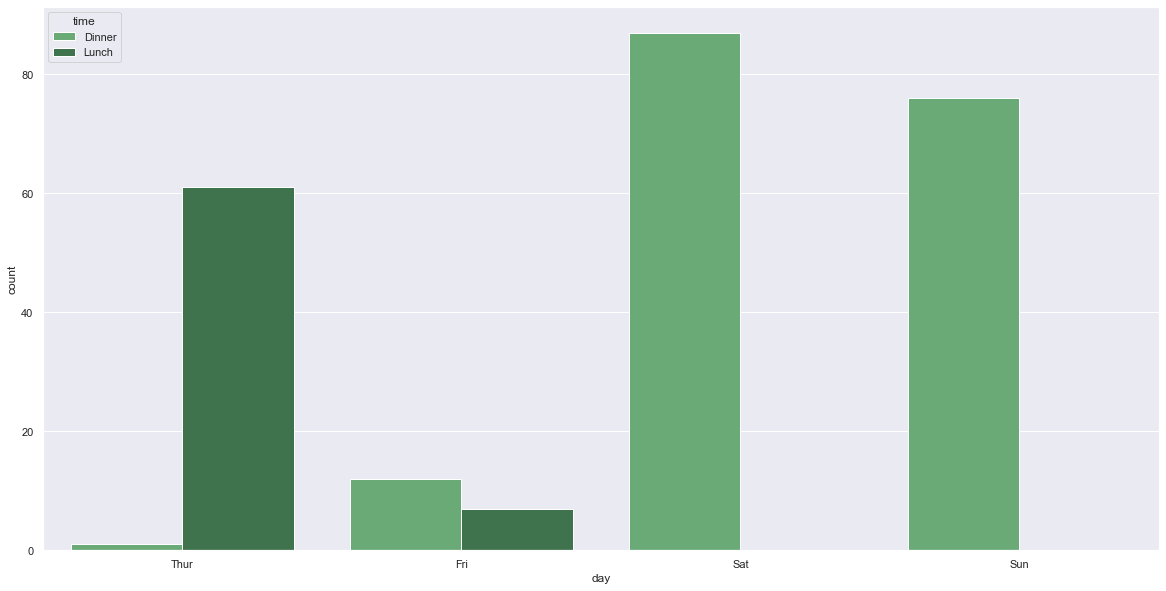

In [38]:
day_order=["Thur", "Fri", "Sat","Sun"]
sns.countplot(x ="day", data =tips, hue ="time", palette ="Greens_d", order =day_order)

En aquesta gràfica veiem que els divendres son el dia amb menys taules servides i que els dissabtes son el dia amb més taules servides. Dissabtes i diumenges no se serveixen taules per dinar i els dijous per sopar se serveixen molt poques taules.

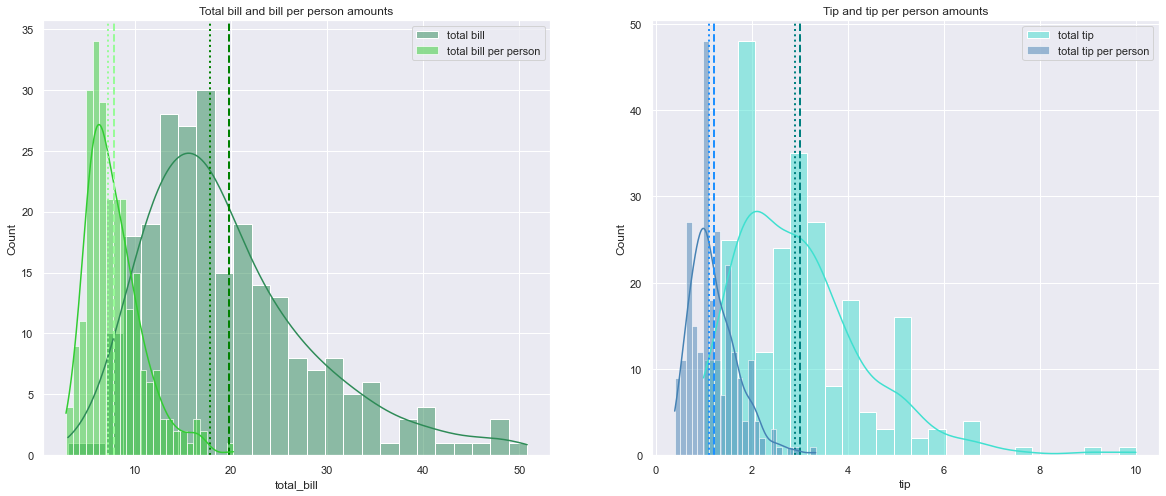

In [102]:
f, axes = plt.subplots(1,2 , figsize=(20, 8))

sns.histplot(tips['total_bill'], kde=True, ax=axes[0], color="seagreen", bins=25, label="total bill")
# afegim una línia vertical a la mitjana
axes[0].axvline(tips['total_bill'].mean(), color='green', linewidth=2, linestyle="--")
# afegim una línia vertical a la mediana
axes[0].axvline(tips['total_bill'].quantile(q=0.5), color='green', linewidth=2, linestyle=":")
# afegim un títol
axes[0].set_title("Total bill and bill per person amounts")

sns.histplot(tips['total_bill_per_person'], kde=True, ax=axes[0], color="limegreen", bins=25, label="total bill per person")
axes[0].axvline(tips['total_bill_per_person'].mean(), color='palegreen', linewidth=2, linestyle="--")
axes[0].axvline(tips['total_bill_per_person'].quantile(q=0.5), color='palegreen', linewidth=2, linestyle=":")


sns.histplot(tips['tip'], kde=True, ax=axes[1], color="turquoise", bins=25, label="total tip")
axes[1].axvline(tips['tip'].mean(), color='teal', linewidth=2, linestyle="--")
axes[1].axvline(tips['tip'].quantile(q=0.5), color='teal', linewidth=2, linestyle=":")
axes[1].set_title("Tip and tip per person amounts");

sns.histplot(tips['total_tip_per_person'], kde=True, ax=axes[1], color="steelblue", bins=25, label="total tip per person")
axes[1].axvline(tips['total_tip_per_person'].mean(), color='dodgerblue', linewidth=2, linestyle="--")
axes[1].axvline(tips['total_tip_per_person'].quantile(q=0.5), color='dodgerblue', linewidth=2, linestyle=":")

#afegim les llegendes
axes[0].legend(loc='best')
axes[1].legend(loc='best')

En aquestes gràfiques podem veure que generalment el total dels comptes està entre 10 i 30 amb una mitja de 20 i un pic màxim d'uns 16. El total de les propines està entre 1 i 4, amb una mitja de 3 i un pic màxim de 2.
A més, el total de compte per persona està entre 5 i 7 amb mitjana de 8 i pic màxim de 6 i el total de propina per persona està molt més repartit. Hi ha un pic màxim a 1 i un altre a 0'6 i 1'1. La mitjana està a 1'2.
La distribució del compte per persona està esbiaxat cap a l'esquerra tot i que no tant com el compte total per taula. Les distribucions de compte per persona i propina per persona son bastant semblants, unimodals, així com les de compte total i propina total, bimodals, tot i que aquesta última és menys uniforme.

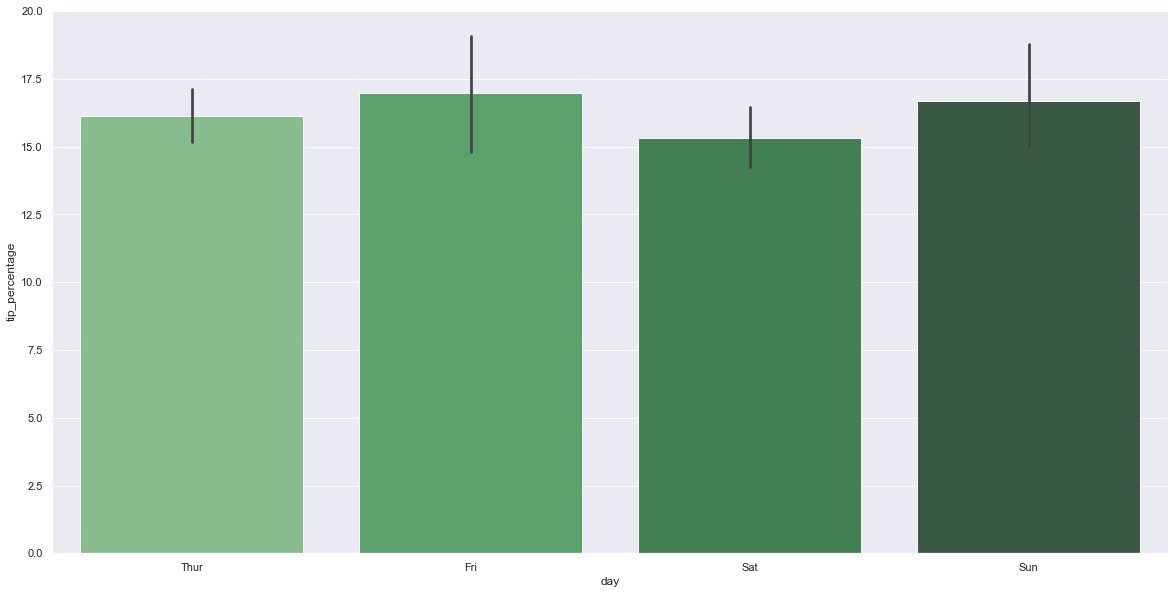

In [35]:
day_order=["Thur", "Fri", "Sat","Sun"]
sns.barplot(x='day', y='tip_percentage', data=tips, order=day_order, palette="Greens_d")
plt.show()

En aquesta gràfica veiem que el divendres és el dia amb el percentatge total de propina sobre compte més alt, lleugerament per sobre del diumenge, tot i que sigui el dia més fluix respecte a taules servides. El dia amb el percentatge més baix és dissabte.

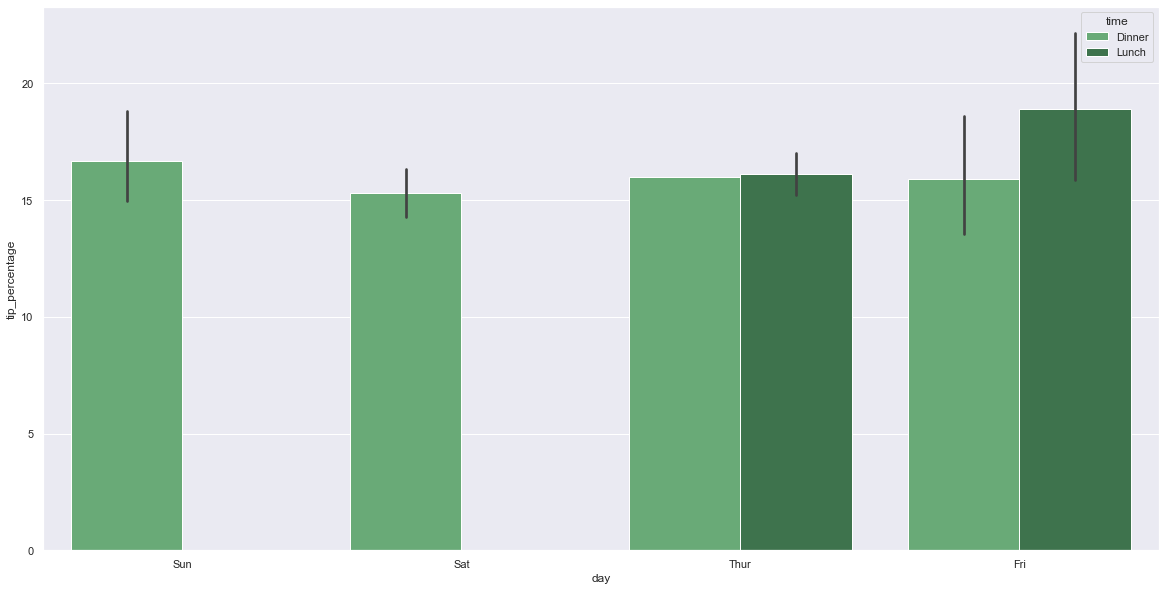

In [25]:
sns.barplot(x='day', y='tip_percentage', hue='time', data=tips, palette="Greens_d")
plt.show()

En aquesta gràfica, similar a l'anterior però tenint en compte no només el dia sino si és dinar o sopar, veiem que el divendres per dinar és el dia amb el percentatge total de propina sobre compte més alt. Durant el dinar de dijous també hi ha un percentatge de propina respecte compte més alt que dijous per sopar.

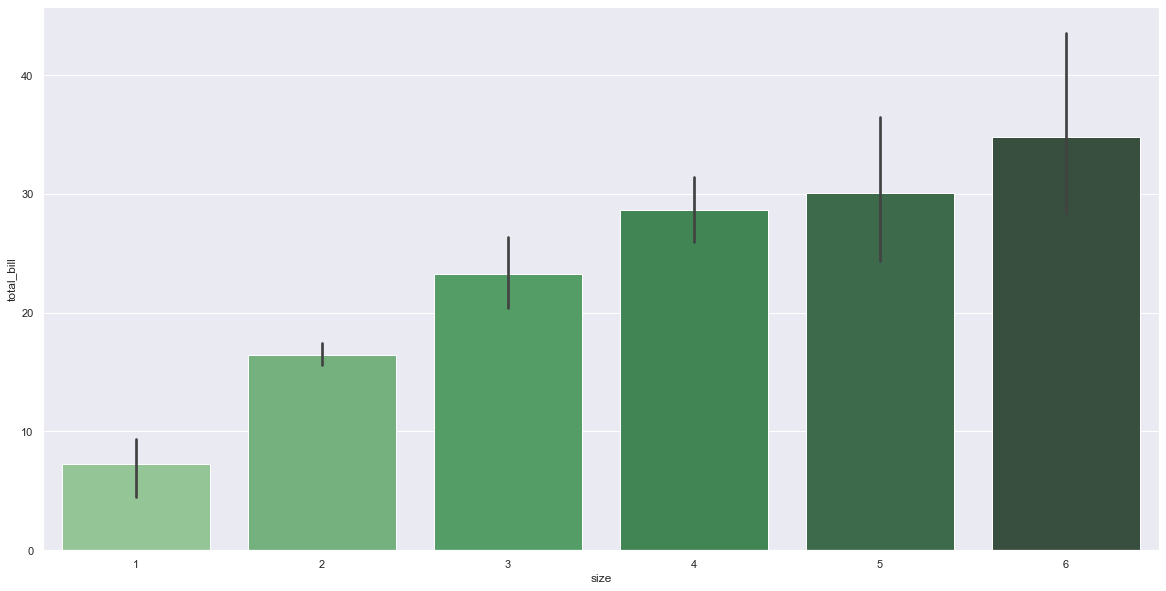

In [125]:
sns.barplot(x='size', y='total_bill', data=tips, palette="Greens_d")
plt.show()


No he utilitzat en cap anàlisi el sexe del pagador/a perquè no crec que sigui rellevant i, a més, em sembla poc ètic i discriminatori.

###EXERCICES###

<div class="alert alert-warning alert-warning"><b><u>Mean</u></b>

The <b><u>sample mean</u></b> <span style=color:blue><b>$\bar{x}$</b></span> of a <em>numerical variable</em> is computed as the <b>sum</b> of all of the <em>observations</em> <b>divided</b> by the number of <em>observations</em>:   
$%$   
\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   
$%$   
where <b>$x_1$, $x_2$, . . . ,$x_n$</b> represent the <b>$n$</b> observed values.   
$%$   
<span style=color:darkred>It is useful to think of the <b>mean</b> as the <u>balancing point</u> of the <b>distribution</b>.</span>
</div>

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

Compare both Equations above. 

* What does $x_1$ correspond to ?,   
* and **$x_2$** ?   
* Can you infer a general meaning to what $x_i$ might represent?
* What was $n$ in this sample of tips?

<span style=color:green><b><u>SOLUTION - 3.1</u></b></span> 

* És el primer valor de la observació de la que estem fent la mitja. Per exemple, si estem buscant la mitja de "tips", serà el primer valor de la columna tips, la propina que han deixat en la taula 1, que és <b>1'01</b>.

* El segon valor de la columna tips, la propina que han deixat en la taula 2, que és <b>1'66</b>.

* El valor de la columna tips en la posició "i".

* El número total de propines que s'han deixat, <b>244</b> en aquest cas.

<div class="alert alert-warning alert-warning"><b><u>Population Mean</u></b>

The <span style=color:blue><b><u>Population mean</u></b></span> has a special label :  <span style=color:blue>$\mu$</span>. The symbol <span style=color:blue>$\mu$</span> is the $Greek$ letter <span style=color:blue>$mu$</span> and represents the <span style=color:blue>average/mean of all observations in the <b>Population</b></span>.   
$%$   
Sometimes a subscript, such as <span style=color:blue><b>$_x$</b></span>, is used to represent which variable the <span style=color:blue><b>population mean</b></span> refers to, e.g. <span style=color:blue><b>$\mu_x$</b></span>
</div>

<span style=color:red><b><u>EXERCISE - 3.2</u></b></span>

The <span style=color:blue>average</span> number of tips (<span style=color:blue><b>population</b></span>) can be estimated using the <span style=color:blue><b>sample data</b></span>.   

Based on the <span style=color:blue>dataset</span> of <b>244</b> $tips$, what would be a reasonable estimate of <span style=color:blue><b>$\mu_x$</b></span>, the <span style=color:blue><b>mean</b></span> tips in the tips dataset?

<span style=color:green><b><u>SOLUTION - 3.2</u></b></span>


La <span style=color:blue> mitjana</span>, <b>2.998</b> per taula i <b>1.213</b> per persona, és una estimació raonable de <span style=color:blue>$\mu_x$</span>.   

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the <b>tip</b> variable using the histogram display above. 

The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context: the <b>tips</b> in the tables of the restaurant. Also note any especially <b>unusual cases</b>.

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

Generalment el total de les propines està entre 1 i 4, amb una mitja de 3 i un pic màxim de 2. A més, el total de propina per persona està molt més repartit. Hi ha un pic màxim a 1 i un altre a 0'6 i 1'1. La mitjana està a 1'2. La distribució de propina per persona és <b>unimodal</b>, i la de propina total <b>bimodal</b>, les dues esbiaxiades cap a l'esquerra. 

Molts dels valors de propina (tant per persona com per taula) estan aprop de la mitja, <b>2'998</b> per taula i <b>1'213</b> per persona, tot i que el valor més repetit no queda molt aprop de la mitja. Això sí, la majoria dels valors estan dins de una std (<b>1'384</b>) de la mitja. Hi ha alguns valors exepcionals (outliers) com 7'8/9/10 en propina per taula i 2'5/2'8/3'3 en propina per persona.

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?
2. What percent is between the median and Q3?

In [134]:
round(tips['tip'].median(),3)

2.9

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


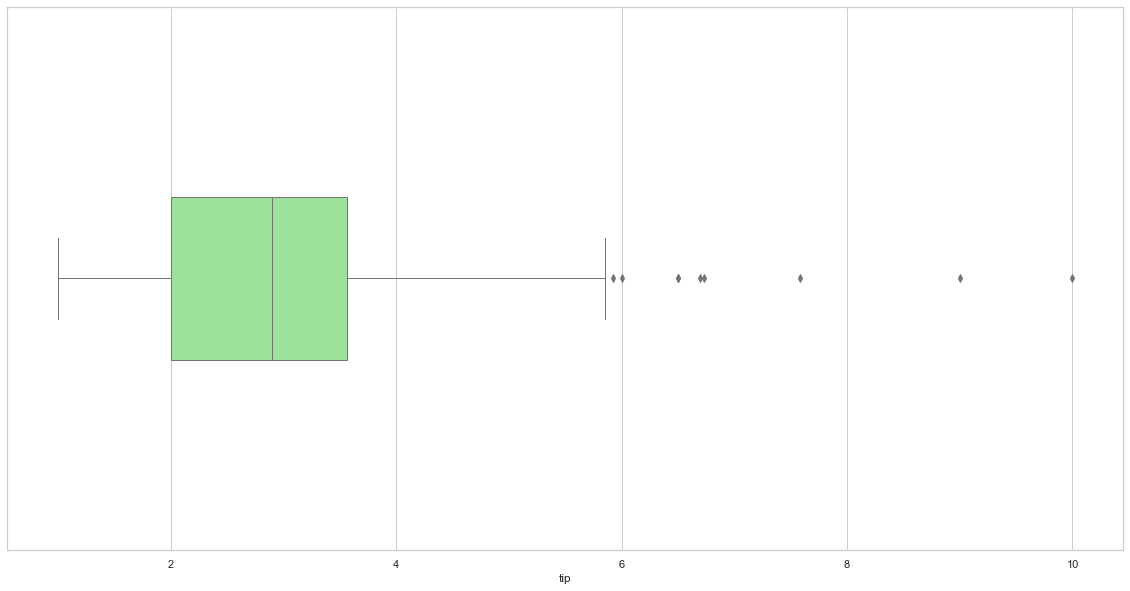

In [138]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips["tip"], color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.3)

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='tip'>

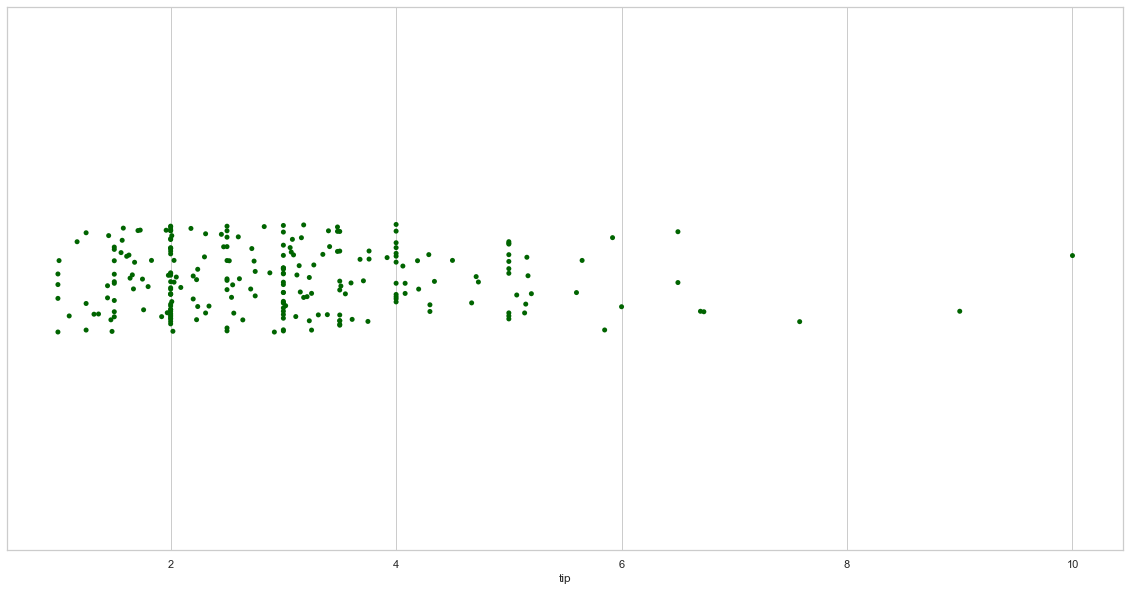

In [139]:
sns.stripplot(x=tips["tip"], orient='v', color='darkgreen')

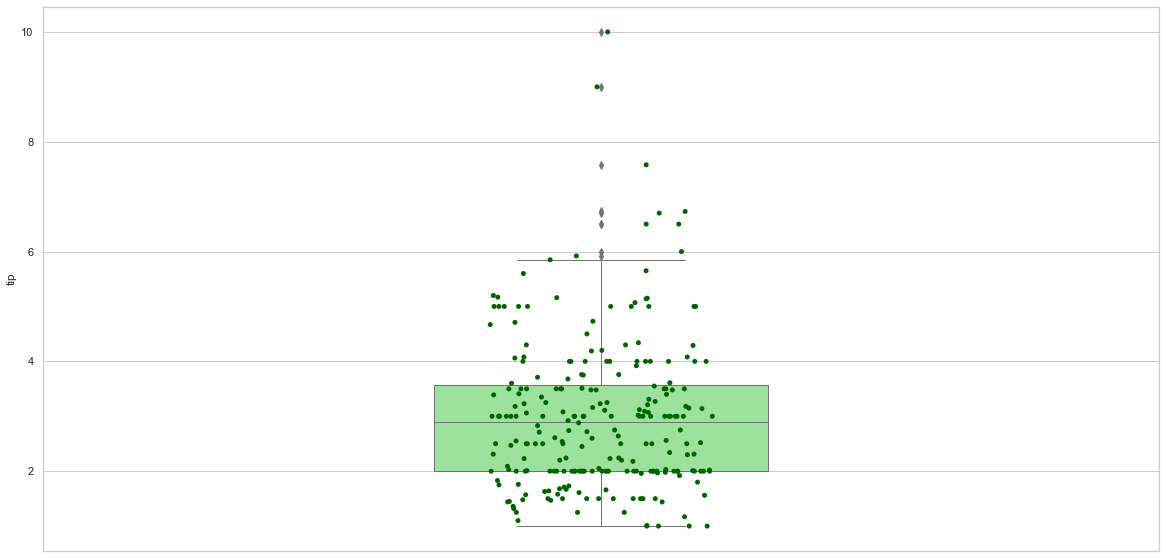

In [141]:
ax = sns.boxplot(y="tip", data=tips,  color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkgreen')

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='tip'>

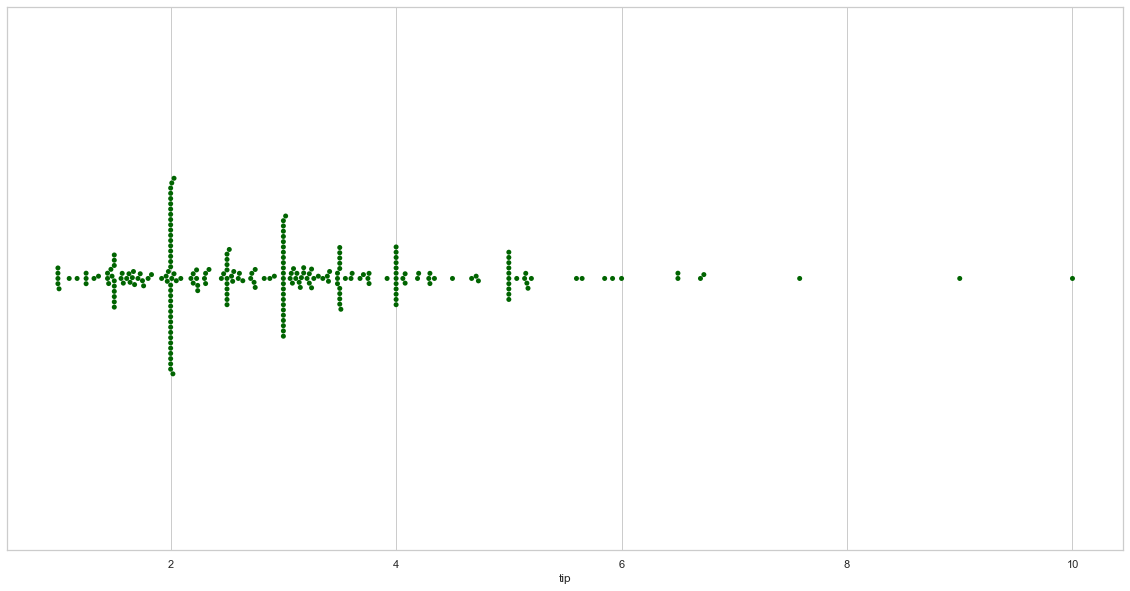

In [142]:
sns.swarmplot(x=tips["tip"], orient='v', color='darkgreen')

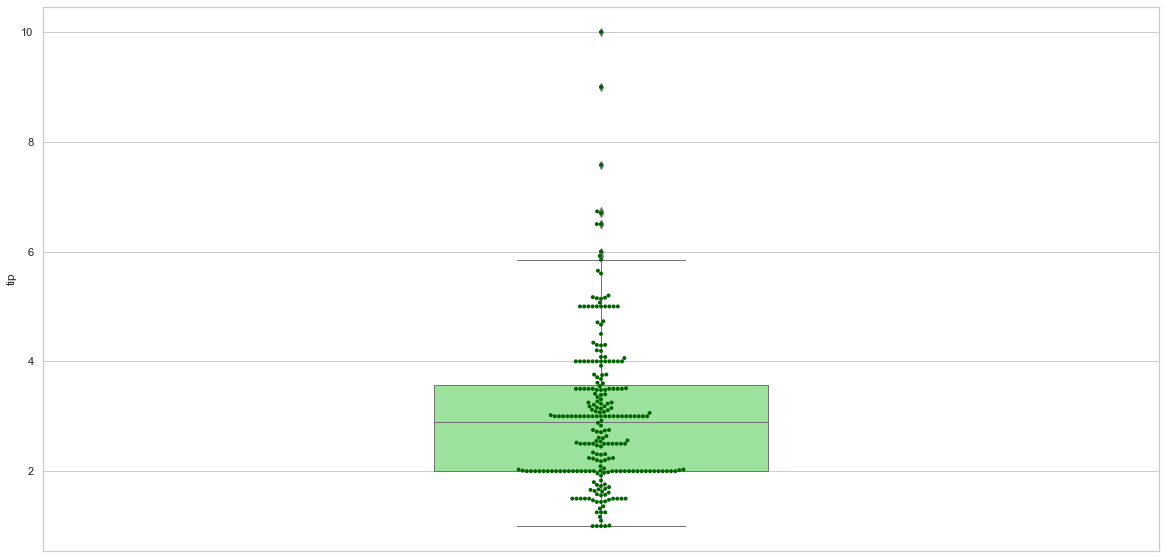

In [143]:
ax = sns.boxplot(y="tip", data=tips,  color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="tip", data=tips, color="darkgreen", orient="v", size=4)

<span style=color:green><b><u>SOLUTION - 3.8</u></b></span> 

1. Entre el Q1 i la mediana està el 25% de la informació.
2. Entre la mediana i el Q3 està el 25% de la informació.

<span style=color:red><b><u>EXERCISE - 3.9</u></b></span> 

estimate the following values for **tip** in the $tips$ dataset: 

a).- $Q1$,   
b).- $Q3$, and    
c).- $IQR$

<span style=color:green><b><u>SOLUTION - 3.9</u></b></span> 

Q1 = 2, Q3 = 3'6, IQR = Q3 - Q1 = 1'6. 

(Valors reals: Q1 = 2, Q3 = 3'56, IQR = 1'56.)

##*Exercice 2*##

*Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat*

In [3]:
movies = pd.read_table(r'C:\Users\Pereira\Documents\IT Academy\Repos GitHub\Pre-processing-data\movies.dat', sep='::', header=None, encoding='cp1252', engine='python', names=['Title', 'Gender'])
movies

,Title,Gender
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama


In [4]:
# new data frame with split value columns
new = movies["Title"].str.split("\(([0-9]{4})\)", n = 1, expand = True)
  
# making separate first name column from new data frame
movies["Title"]= new[0]
  
# making separate last name column from new data frame
movies["Year"]= new[1]
  
# df display
movies

,Title,Gender,Year
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000
3951,Two Family House,Drama,2000


In [6]:
# new data frame with split value columns
new = movies["Gender"].str.split("|", n = 5, expand = True)
  
# making separate first name column from new data frame
movies["Gender 1"]= new[0]
  
# making separate last name column from new data frame
movies["Gender 2"]= new[1]

# making separate last name column from new data frame
movies["Gender 3"]= new[2]

# making separate last name column from new data frame
movies["Gender 4"]= new[3]

# making separate last name column from new data frame
movies["Gender 5"]= new[4]

# making separate last name column from new data frame
movies["Gender 5"]= new[5]

movies.drop(columns =["Gender"], inplace = True)

# df display
movies

,Title,Year,Gender 1,Gender 2,Gender 3,Gender 4,Gender 5
1,Toy Story,1995,Animation,Children's,Comedy,None,None
2,Jumanji,1995,Adventure,Children's,Fantasy,None,None
3,Grumpier Old Men,1995,Comedy,Romance,None,None,None
4,Waiting to Exhale,1995,Comedy,Drama,None,None,None
5,Father of the Bride Part II,1995,Comedy,None,None,None,None
...,...,...,...,...,...,...,...
3948,Meet the Parents,2000,Comedy,None,None,None,None
3949,Requiem for a Dream,2000,Drama,None,None,None,None
3950,Tigerland,2000,Drama,None,None,None,None
3951,Two Family House,2000,Drama,None,None,None,None


In [170]:
movies.Year = movies.Year.astype('int64')
movies.Title = movies.Title.astype('string')
movies.dtypes

Title       string
Year         int64
Gender 1    object
Gender 2    object
Gender 3    object
Gender 4    object
Gender 5    object
dtype: object

In [256]:
movies.describe(include='all')

,Title,Year,Gender 1,Gender 2,Gender 3,Gender 4,Gender 5
count,3883,3883.000000,3883,1858,536,115,1
unique,3841,NaN,18,17,15,13,1
top,Hamlet,NaN,Drama,Drama,Thriller,Thriller,War
freq,5,NaN,1176,381,120,40,1
mean,NaN,1986.066959,NaN,NaN,NaN,NaN,NaN
std,NaN,16.895690,NaN,NaN,NaN,NaN,NaN
min,NaN,1919.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1982.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1994.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN


Veiem que el count total és 3883, excepte en les columnes de Gender 2,3,4 i 5 que va baixant ja que algunes pel·lícules tenen només 1 gènere i d'altres més.  

Title: Hamlet és el títol més repetit, 5 cops.

Year: el 1996 és el que té més pelis comptabilitzades, 327.

Gender 1: El gènere més repetit és drama, 1176 de 3883, és a dir un 30'28% de les pelis tenen drama com a primer gènere.

Gender 2: El gènere més repetit torna a ser drama, 381 de 1858, és a dir un 20'5% de les pelis tenen drama com a segon gènere.

Gender 3: El gènere més repetit és thriller, 120 de 436, és a dir un 22'38% de les pelis tenen thriller com a tercer gènere.

Gender 4: El gènere més repetit torna a ser thriller, 40 de 115, és a dir un 34'78% de les pelis tenen thriller com a quart gènere.

Gender 5: només hi ha una peli que arribi als 5 gèneres.

In [146]:
movies['Gender 1'].unique().tolist()

['Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Drama',
 'Thriller',
 'Crime',
 'Romance',
 "Children's",
 'Documentary',
 'Sci-Fi',
 'Horror',
 'Western',
 'Mystery',
 'Film-Noir',
 'War',
 'Fantasy',
 'Musical']

In [147]:
movies['Gender 2'].unique().tolist()

["Children's",
 'Romance',
 'Drama',
 None,
 'Crime',
 'Adventure',
 'Horror',
 'Thriller',
 'Comedy',
 'Sci-Fi',
 'War',
 'Mystery',
 'Musical',
 'Film-Noir',
 'Fantasy',
 'Western',
 'Animation',
 'Documentary']

In [148]:
movies['Gender 3'].unique().tolist()

['Comedy',
 'Fantasy',
 None,
 'Thriller',
 'Romance',
 'Drama',
 'Musical',
 'Crime',
 'War',
 'Mystery',
 'Sci-Fi',
 'Western',
 'Horror',
 "Children's",
 'Animation',
 'Film-Noir']

In [149]:
movies['Gender 4'].unique().tolist()

[None,
 'Romance',
 'Horror',
 'Musical',
 'Crime',
 'Sci-Fi',
 'Thriller',
 'Fantasy',
 'Western',
 "Children's",
 'Drama',
 'Comedy',
 'War',
 'Mystery']

In [150]:
movies['Gender 5'].unique().tolist()

[None, 'War']

In [151]:
movies['Year'].unique().tolist()

['1995',
 '1994',
 '1996',
 '1976',
 '1993',
 '1992',
 '1988',
 '1967',
 '1964',
 '1977',
 '1965',
 '1982',
 '1962',
 '1990',
 '1991',
 '1989',
 '1937',
 '1940',
 '1969',
 '1981',
 '1973',
 '1970',
 '1960',
 '1955',
 '1956',
 '1959',
 '1968',
 '1980',
 '1975',
 '1986',
 '1948',
 '1943',
 '1963',
 '1950',
 '1946',
 '1987',
 '1997',
 '1974',
 '1958',
 '1949',
 '1972',
 '1998',
 '1933',
 '1952',
 '1951',
 '1957',
 '1961',
 '1954',
 '1934',
 '1944',
 '1942',
 '1941',
 '1953',
 '1939',
 '1947',
 '1945',
 '1938',
 '1935',
 '1936',
 '1926',
 '1932',
 '1930',
 '1971',
 '1979',
 '1966',
 '1978',
 '1985',
 '1983',
 '1984',
 '1931',
 '1922',
 '1927',
 '1929',
 '1928',
 '1925',
 '1923',
 '1999',
 '1919',
 '2000',
 '1920',
 '1921']

In [152]:
movies.dtypes

Title       object
Year        object
Gender 1    object
Gender 2    object
Gender 3    object
Gender 4    object
Gender 5    object
dtype: object

In [153]:
column_values = movies[["Gender 1", "Gender 2", "Gender 3", "Gender 4", "Gender 5"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Animation' "Children's" 'Comedy' None 'Adventure' 'Fantasy' 'Romance'
 'Drama' 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [239]:
total_most_movies_per_year = pd.DataFrame(movies["Year"].value_counts(ascending=False).reset_index())
total_most_movies_per_year.columns = ['Year', 'TotalMovies']
total_most_movies_per_year

,Year,TotalMovies
0,1996,345
1,1995,342
2,1998,337
3,1997,315
4,1999,283
...,...,...
76,1923,3
77,1919,3
78,1922,2
79,1920,2


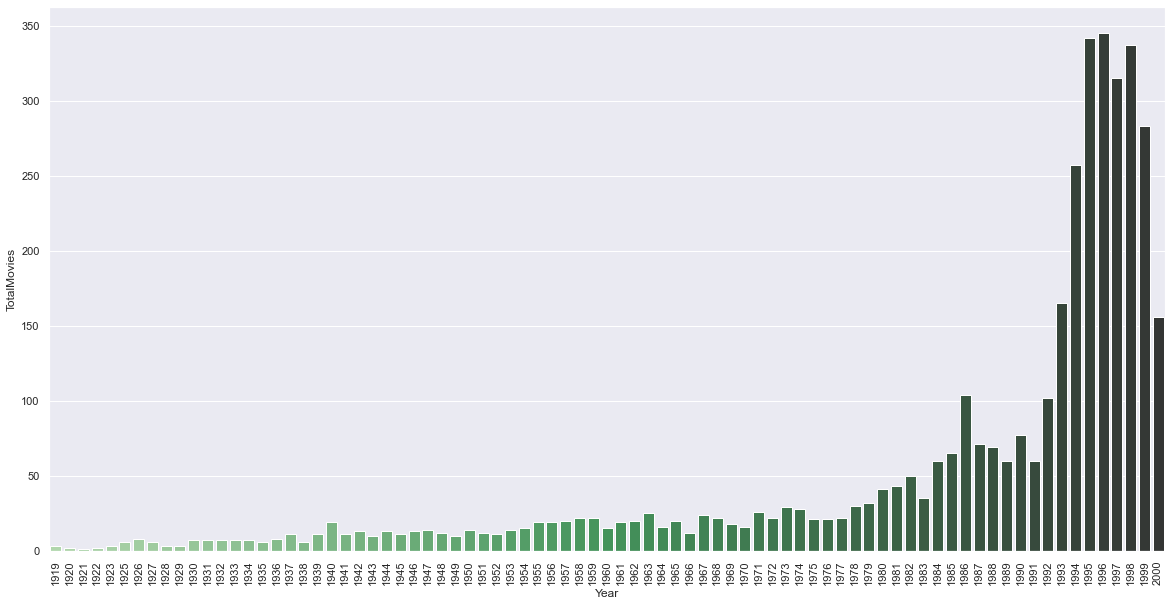

In [242]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'Year', y = 'TotalMovies',data = total_most_movies_per_year,palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

En aquesta gràfica veiem el nº total de pelis per any.

In [16]:
most_movies_per_year = pd.DataFrame(movies["Year"].value_counts(ascending=False).head(10).reset_index())
most_movies_per_year.columns = ['Year', 'TotalMovies']
most_movies_per_year

,Year,TotalMovies
0,1996,345
1,1995,342
2,1998,337
3,1997,315
4,1999,283
5,1994,257
6,1993,165
7,2000,156
8,1986,104
9,1992,102


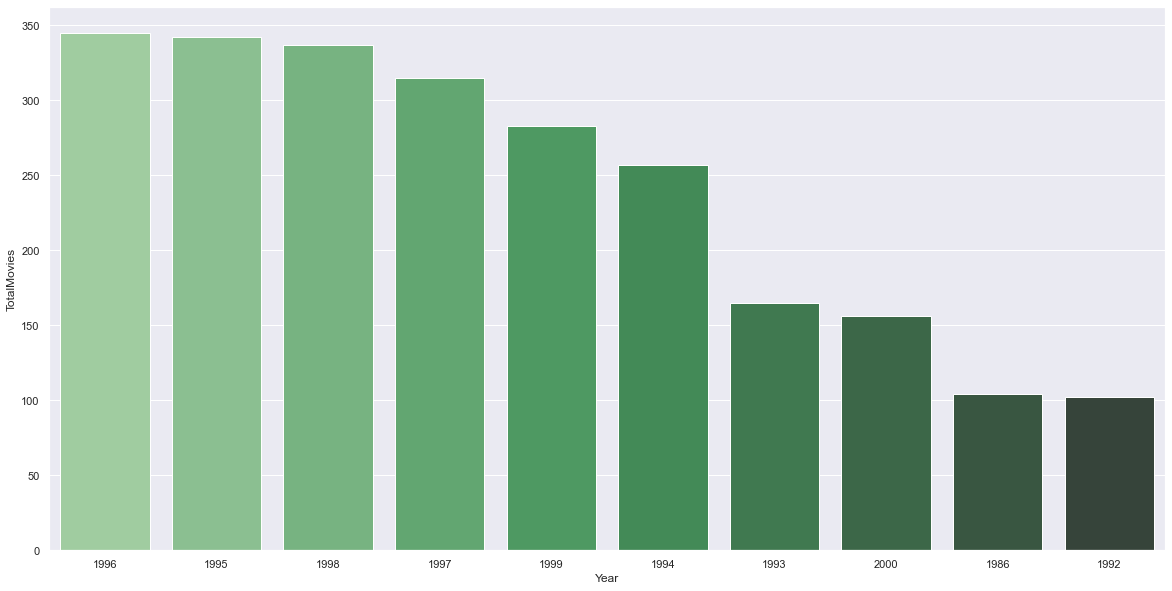

In [127]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="Year", y="TotalMovies", data=most_movies_per_year, palette="Greens_d")
plt.show()

En aquesta gràfica veiem el nº total de pelis dels 10 anys amb més pelis.

In [243]:
least_movies_per_year = pd.DataFrame(movies["Year"].value_counts(ascending=True).head(10).reset_index())
least_movies_per_year.columns = ['Year', 'TotalMovies']
least_movies_per_year

,Year,TotalMovies
0,1921,1
1,1920,2
2,1922,2
3,1919,3
4,1923,3
5,1928,3
6,1929,3
7,1925,6
8,1927,6
9,1935,6


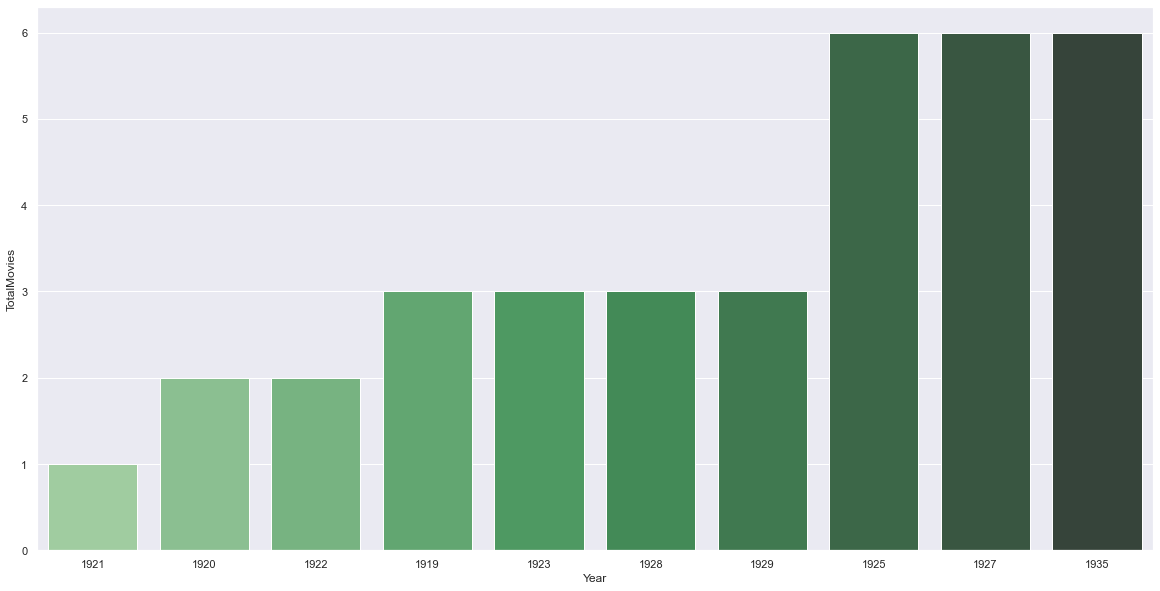

In [126]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="Year", y="TotalMovies", data=least_movies_per_year, palette="Greens_d")
plt.show()

En aquesta gràfica veiem el nº total de pelis dels 10 anys amb menys pelis.

In [55]:
most_movies_per_gender1 = pd.DataFrame(movies["Gender 1"].value_counts(ascending=False).reset_index())
most_movies_per_gender1.columns = ['Gender', 'TotalMovies']
most_movies_per_gender1

,Gender,TotalMovies
0,Drama,1176
1,Comedy,1024
2,Action,503
3,Horror,262
4,Adventure,155
5,Crime,131
6,Documentary,123
7,Thriller,101
8,Animation,90
9,Children's,89


In [56]:
most_movies_per_gender2 = pd.DataFrame(movies["Gender 2"].value_counts(ascending=False).reset_index())
most_movies_per_gender2.columns = ['Gender', 'TotalMovies']
most_movies_per_gender2

,Gender,TotalMovies
0,Drama,381
1,Romance,327
2,Thriller,228
3,Children's,147
4,Sci-Fi,140
5,Comedy,129
6,Adventure,128
7,War,78
8,Horror,71
9,Crime,63


In [57]:
most_movies_per_gender3 = pd.DataFrame(movies["Gender 3"].value_counts(ascending=False).reset_index())
most_movies_per_gender3.columns = ['Gender', 'TotalMovies']
most_movies_per_gender3

,Gender,TotalMovies
0,Thriller,120
1,Romance,81
2,Sci-Fi,69
3,Comedy,43
4,War,42
5,Drama,38
6,Fantasy,37
7,Musical,31
8,Mystery,18
9,Western,15


In [58]:
most_movies_per_gender4 = pd.DataFrame(movies["Gender 4"].value_counts(ascending=False).reset_index())
most_movies_per_gender4.columns = ['Gender', 'TotalMovies']
most_movies_per_gender4

,Gender,TotalMovies
0,Thriller,40
1,Sci-Fi,18
2,Romance,10
3,Musical,10
4,Drama,8
5,Fantasy,7
6,War,7
7,Horror,4
8,Comedy,4
9,Crime,3


In [59]:
most_movies_per_gender5 = pd.DataFrame(movies["Gender 5"].value_counts(ascending=False).reset_index())
most_movies_per_gender5.columns = ['Gender', 'TotalMovies']
most_movies_per_gender5

,Gender,TotalMovies
0,War,1


In [113]:
result = pd.concat([most_movies_per_gender1, most_movies_per_gender2, most_movies_per_gender3, most_movies_per_gender4, most_movies_per_gender5], axis=1)
display(result)

,Gender,TotalMovies,Gender,TotalMovies,Gender,TotalMovies,Gender,TotalMovies,Gender,TotalMovies
0,Drama,1176,Drama,381.0,Thriller,120.0,Thriller,40.0,War,1.0
1,Comedy,1024,Romance,327.0,Romance,81.0,Sci-Fi,18.0,NaN,NaN
2,Action,503,Thriller,228.0,Sci-Fi,69.0,Romance,10.0,NaN,NaN
3,Horror,262,Children's,147.0,Comedy,43.0,Musical,10.0,NaN,NaN
4,Adventure,155,Sci-Fi,140.0,War,42.0,Drama,8.0,NaN,NaN
5,Crime,131,Comedy,129.0,Drama,38.0,Fantasy,7.0,NaN,NaN
6,Documentary,123,Adventure,128.0,Fantasy,37.0,War,7.0,NaN,NaN
7,Thriller,101,War,78.0,Musical,31.0,Horror,4.0,NaN,NaN
8,Animation,90,Horror,71.0,Mystery,18.0,Comedy,4.0,NaN,NaN
9,Children's,89,Crime,63.0,Western,15.0,Crime,3.0,NaN,NaN


In [114]:
df2 = pd.merge(most_movies_per_gender1, most_movies_per_gender2, how='left', on=['Gender'])
df2

,Gender,TotalMovies_x,TotalMovies_y
0,Drama,1176,381.0
1,Comedy,1024,129.0
2,Action,503,NaN
3,Horror,262,71.0
4,Adventure,155,128.0
5,Crime,131,63.0
6,Documentary,123,4.0
7,Thriller,101,228.0
8,Animation,90,12.0
9,Children's,89,147.0


In [115]:
df3 = pd.merge(df2, most_movies_per_gender3, how='left', on=['Gender'])
df3

,Gender,TotalMovies_x,TotalMovies_y,TotalMovies
0,Drama,1176,381.0,38.0
1,Comedy,1024,129.0,43.0
2,Action,503,NaN,NaN
3,Horror,262,71.0,6.0
4,Adventure,155,128.0,NaN
5,Crime,131,63.0,14.0
6,Documentary,123,4.0,NaN
7,Thriller,101,228.0,120.0
8,Animation,90,12.0,3.0
9,Children's,89,147.0,14.0


In [116]:
df4 = pd.merge(df3, most_movies_per_gender4, how='left', on=['Gender'])
df4

C:\Users\Pereira\AppData\Local\Temp/ipykernel_13940/654368244.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotalMovies_x'} in the result is deprecated and will raise a MergeError in a future version.
  df4 = pd.merge(df3, most_movies_per_gender4, how='left', on=['Gender'])


,Gender,TotalMovies_x,TotalMovies_y,TotalMovies_x,TotalMovies_y
0,Drama,1176,381.0,38.0,8.0
1,Comedy,1024,129.0,43.0,4.0
2,Action,503,NaN,NaN,NaN
3,Horror,262,71.0,6.0,4.0
4,Adventure,155,128.0,NaN,NaN
5,Crime,131,63.0,14.0,3.0
6,Documentary,123,4.0,NaN,NaN
7,Thriller,101,228.0,120.0,40.0
8,Animation,90,12.0,3.0,NaN
9,Children's,89,147.0,14.0,1.0


In [122]:
df5 = pd.merge(df4, most_movies_per_gender5, how='left', on=['Gender'])
df5

,Gender,TotalMovies_x,TotalMovies_y,TotalMovies_x,TotalMovies_y,TotalMovies
0,Drama,1176,381.0,38.0,8.0,NaN
1,Comedy,1024,129.0,43.0,4.0,NaN
2,Action,503,NaN,NaN,NaN,NaN
3,Horror,262,71.0,6.0,4.0,NaN
4,Adventure,155,128.0,NaN,NaN,NaN
5,Crime,131,63.0,14.0,3.0,NaN
6,Documentary,123,4.0,NaN,NaN,NaN
7,Thriller,101,228.0,120.0,40.0,NaN
8,Animation,90,12.0,3.0,NaN,NaN
9,Children's,89,147.0,14.0,1.0,NaN


In [123]:
#trobem el número total de pelis per cada gènere.
df5['Total Movies per Gender']=df5.sum(numeric_only=True, axis=1)

In [124]:
df5

,Gender,TotalMovies_x,TotalMovies_y,TotalMovies_x,TotalMovies_y,TotalMovies,Total Movies per Gender
0,Drama,1176,381.0,38.0,8.0,NaN,1603.0
1,Comedy,1024,129.0,43.0,4.0,NaN,1200.0
2,Action,503,NaN,NaN,NaN,NaN,503.0
3,Horror,262,71.0,6.0,4.0,NaN,343.0
4,Adventure,155,128.0,NaN,NaN,NaN,283.0
5,Crime,131,63.0,14.0,3.0,NaN,211.0
6,Documentary,123,4.0,NaN,NaN,NaN,127.0
7,Thriller,101,228.0,120.0,40.0,NaN,489.0
8,Animation,90,12.0,3.0,NaN,NaN,105.0
9,Children's,89,147.0,14.0,1.0,NaN,251.0


In [125]:
Total = df5['Total Movies per Gender'].sum()
print (Total)

6393.0


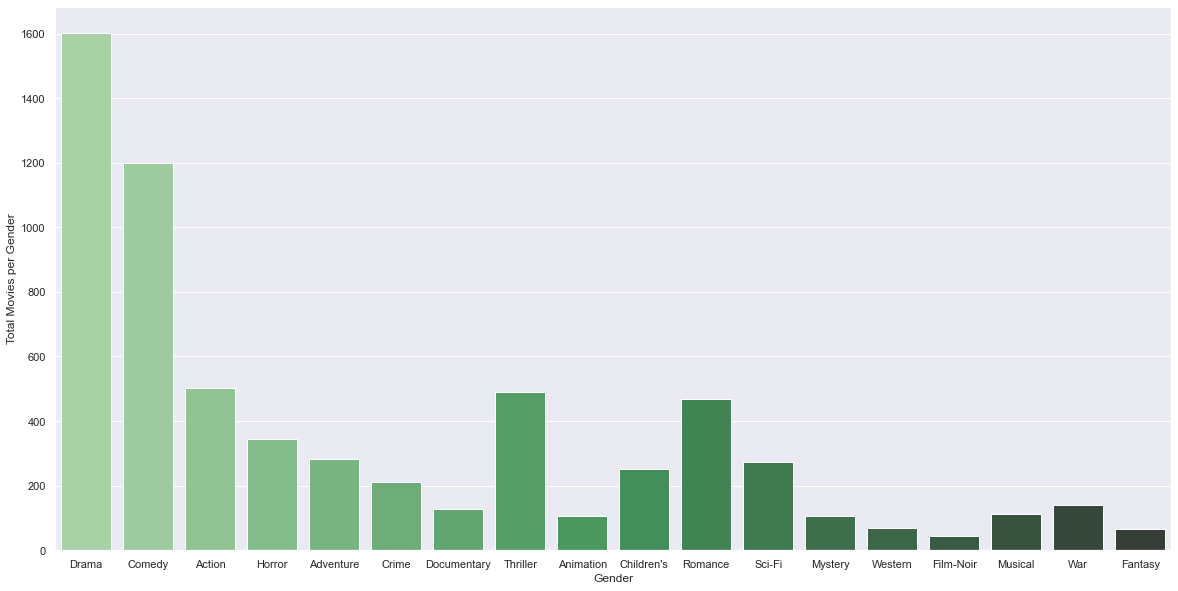

In [121]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="Gender", y="Total Movies per Gender", data=df5, palette="Greens_d")
plt.show()

En aquesta gràfica tenim el total de pelis per gènere. Com que algunes pelis tenen més d'un gènere, el recompte total de pelis per gènere (6393) surt més alt que el recompte total de pelis en si (3883). Veiem que el gènere més repetit és drama  amb bastanta diferència i el menys film-noir.

<div class="alert alert-warning alert-warning"><b><u>Mean</u></b>

The <b><u>sample mean</u></b> <span style=color:blue><b>$\bar{x}$</b></span> of a <em>numerical variable</em> is computed as the <b>sum</b> of all of the <em>observations</em> <b>divided</b> by the number of <em>observations</em>:   
$%$   
\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   
$%$   
where <b>$x_1$, $x_2$, . . . ,$x_n$</b> represent the <b>$n$</b> observed values.   
$%$   
<span style=color:darkred>It is useful to think of the <b>mean</b> as the <u>balancing point</u> of the <b>distribution</b>.</span>
</div>

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

Compare both Equations above. 

* What does $x_1$ correspond to ?,   
* and **$x_2$** ?   
* Can you infer a general meaning to what $x_i$ might represent?
* What was $n$ in this dataset?

<span style=color:green><b><u>SOLUTION - 3.1</u></b></span> 

* És el primer valor de la observació de la que estem fent la mitja. Per exemple, si estem buscant la mitja de "years", serà el primer valor de la columna years, l'any en el que va sortir la primera peli, que és <b>1995</b>.

* El segon valor de la columna years, l'any en el que va sortir la segona peli, que és <b>1995/b>.

* El valor de la columna years en la posició "i".

* El número total d'anys que hi ha al dataset, <b>3883</b> en aquest cas.

<div class="alert alert-warning alert-warning"><b><u>Population Mean</u></b>

The <span style=color:blue><b><u>Population mean</u></b></span> has a special label :  <span style=color:blue>$\mu$</span>. The symbol <span style=color:blue>$\mu$</span> is the $Greek$ letter <span style=color:blue>$mu$</span> and represents the <span style=color:blue>average/mean of all observations in the <b>Population</b></span>.   
$%$   
Sometimes a subscript, such as <span style=color:blue><b>$_x$</b></span>, is used to represent which variable the <span style=color:blue><b>population mean</b></span> refers to, e.g. <span style=color:blue><b>$\mu_x$</b></span>
</div>

<span style=color:red><b><u>EXERCISE - 3.2</u></b></span>

The <span style=color:blue>average</span> year (<span style=color:blue><b>population</b></span>) can be estimated using the <span style=color:blue><b>sample data</b></span>.   

Based on the <span style=color:blue>dataset</span> of <b>81</b> $years$, what would be a reasonable estimate of <span style=color:blue><b>$\mu_x$</b></span>, the <span style=color:blue><b>mean</b></span> years in the movies dataset?

In [168]:
round(movies['Year'].mean(),0)

1986.0

<span style=color:green><b><u>SOLUTION - 3.2</u></b></span>


La <span style=color:blue> mitjana</span>, <b>1986</b>, dels anys en que van sortir les pelis, és una estimació raonable de <span style=color:blue>$\mu_x$</span>.   

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the <b>years</b> variable using the histogram display above. 

The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context: the <b>years</b> when the movies were presented. Also note any especially <b>unusual cases</b>.

In [246]:
round(movies.Year.std(),3)

16.896

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

Generalment la majoria de pelis van sortir entre els anys 1994 i 1999, amb un any mitjà de sortida al 1986 i un pic màxim de pelis al 1996. La distribució dels anys és <b>unimodal</b>, esbiaxiada cap a la dreta. 

Molts dels valors d'anys estan aprop (no tocant) de la mitja, <b>1986</b>, tot i que el valor més repetit (1996) no queda molt aprop de la mitja. Això sí, la majoria dels valors estan dins de una std (<b>16'9</b>) de la mitja. Els valors exepcionals (outliers), serien els que hi ha abans de 1960.

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?
2. What percent is between the median and Q3?

In [248]:
round(movies['Year'].median(),0)

1994.0

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


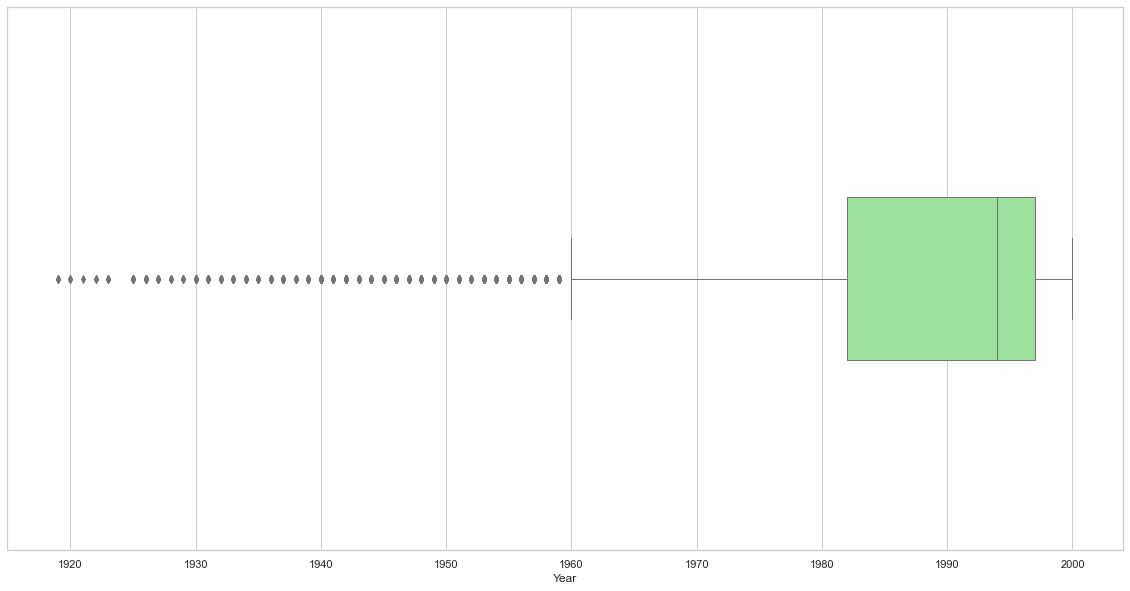

In [249]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=movies["Year"], color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.3)

C:\Users\Pereira\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Year'>

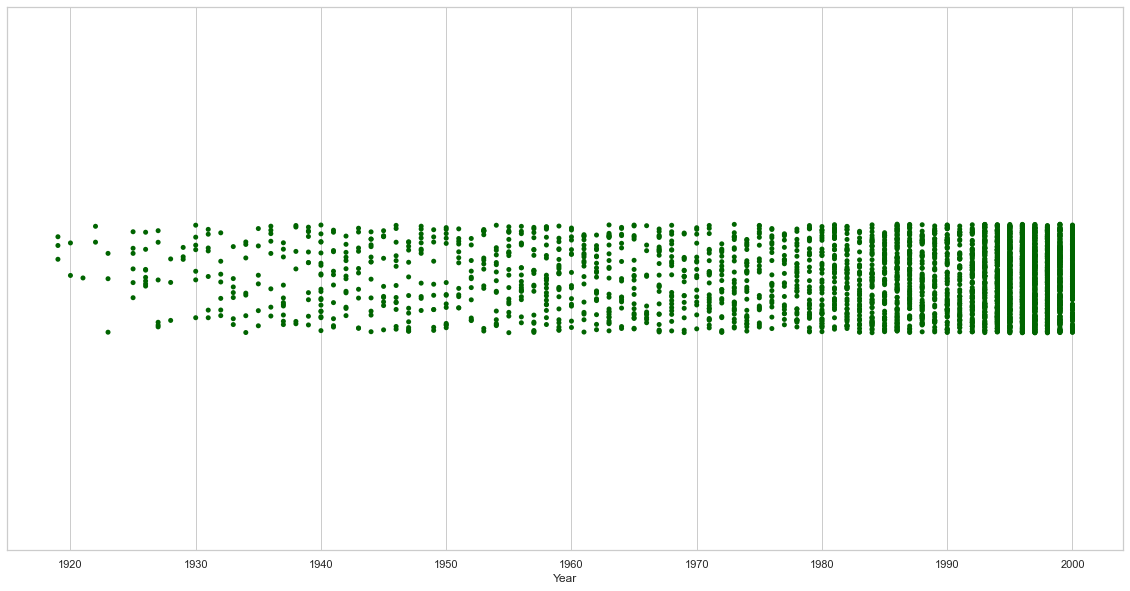

In [250]:
sns.stripplot(x=movies["Year"], orient='v', color='darkgreen')

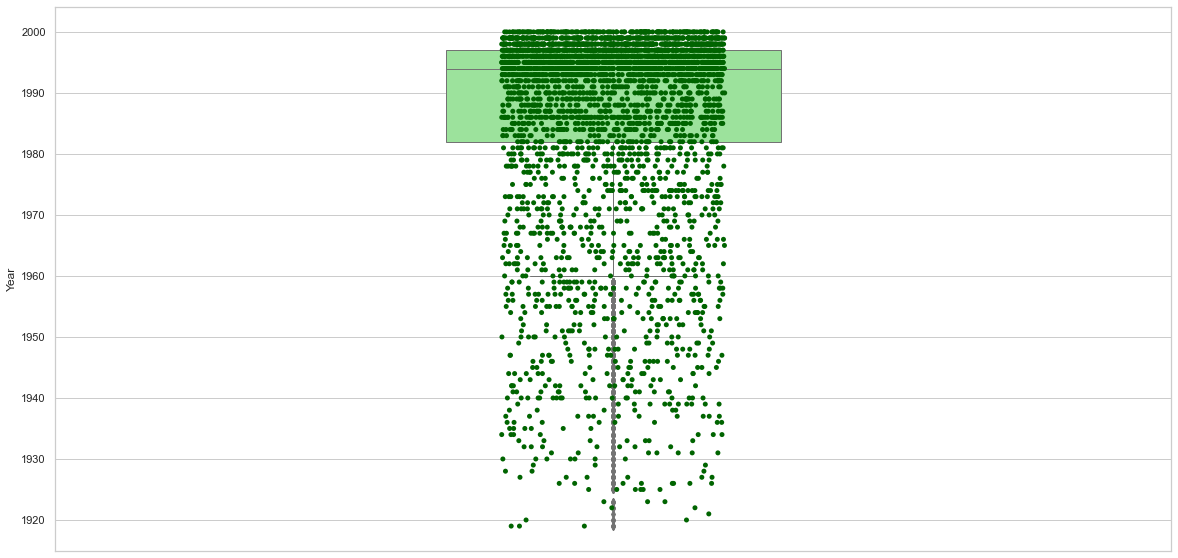

In [252]:
ax = sns.boxplot(y="Year", data=movies,  color='lightgreen', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=movies["Year"], orient='v', color='darkgreen')

<span style=color:green><b><u>SOLUTION - 3.8</u></b></span> 

1. Entre el Q1 i la mediana està el 25% de la informació.
2. Entre la mediana i el Q3 està el 25% de la informació.

<span style=color:red><b><u>EXERCISE - 3.9</u></b></span> 

estimate the following values for **year** in the $movies$ dataset: 

a).- $Q1$,   
b).- $Q3$, and    
c).- $IQR$

<span style=color:green><b><u>SOLUTION - 3.9</u></b></span> 

Q1 = 1982, Q3 = 1997, IQR = Q3 - Q1 = 15. 

##*Exercice 3*##

*En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.*

In [212]:
pattern = 'II|[0-9]'

#sequels = movies['Title'].str.contains(pattern, case=True, na=False)
#movies[sequels]


sequels = pd.DataFrame(movies[movies["Title"].str.contains(pattern, case=True, na=False)])

sequels

,Title,Year,Gender 1,Gender 2,Gender 3,Gender 4,Gender 5
5,Father of the Bride Part II,1995,Comedy,None,None,None,None
41,Richard III,1995,Drama,War,None,None,None
47,Seven (Se7en),1995,Crime,Thriller,None,None,None
66,Lawnmower Man 2: Beyond Cyberspace,1996,Sci-Fi,Thriller,None,None,None
126,"NeverEnding Story III, The",1994,Adventure,Children's,Fantasy,None,None
...,...,...,...,...,...,...,...
3918,Hellbound: Hellraiser II,1988,Horror,None,None,None,None
3919,Hellraiser III: Hell on Earth,1992,Horror,None,None,None,None
3939,"Slumber Party Massacre II, The",1987,Horror,None,None,None,None
3940,"Slumber Party Massacre III, The",1990,Horror,None,None,None,None


In [219]:
most_sequels_per_year = pd.DataFrame(sequels["Year"].value_counts(ascending=False).reset_index())
most_sequels_per_year.columns = ['Year', 'TotalSequels']
most_sequels_per_year

,Year,TotalSequels
0,1990,16
1,1994,16
2,1998,15
3,1989,14
4,1988,14
5,1995,14
6,1996,13
7,1997,11
8,1992,11
9,1993,10


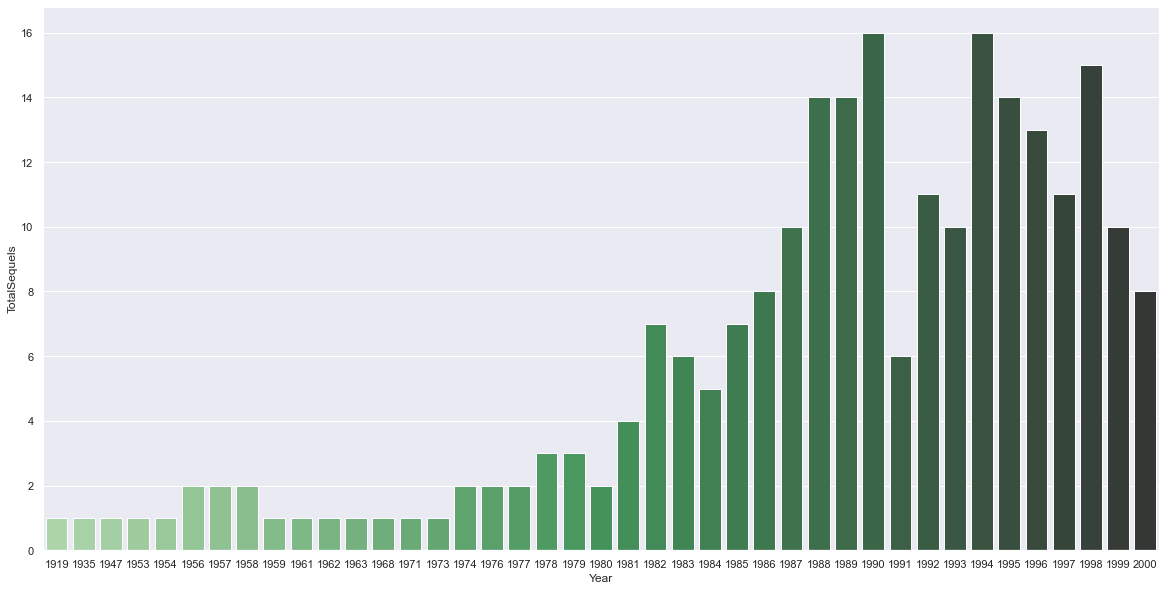

In [223]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="Year", y='TotalSequels', data=most_sequels_per_year, palette="Greens_d")
plt.show()

In [224]:
most_sequel_per_gender1 = pd.DataFrame(sequels["Gender 1"].value_counts(ascending=False).reset_index())
most_sequel_per_gender1.columns = ['Gender', 'TotalSequels']
most_sequel_per_gender1

,Gender,TotalSequels
0,Action,62
1,Horror,62
2,Comedy,42
3,Drama,25
4,Adventure,10
5,Animation,7
6,Children's,7
7,Sci-Fi,5
8,Thriller,5
9,Crime,4


In [225]:
most_sequel_per_gender2 = pd.DataFrame(sequels["Gender 2"].value_counts(ascending=False).reset_index())
most_sequel_per_gender2.columns = ['Gender', 'TotalSequels']
most_sequel_per_gender2

,Gender,TotalSequels
0,Sci-Fi,21
1,Comedy,18
2,Thriller,16
3,Children's,16
4,Drama,10
5,War,9
6,Adventure,9
7,Horror,9
8,Crime,7
9,Mystery,4


In [226]:
most_sequel_per_gender3 = pd.DataFrame(sequels["Gender 3"].value_counts(ascending=False).reset_index())
most_sequel_per_gender3.columns = ['Gender', 'TotalSequels']
most_sequel_per_gender3

,Gender,TotalSequels
0,Thriller,14
1,Drama,8
2,Sci-Fi,7
3,Fantasy,6
4,Musical,3
5,Comedy,3
6,Crime,3
7,Western,2
8,War,1
9,Romance,1


In [227]:
most_sequel_per_gender4 = pd.DataFrame(sequels["Gender 4"].value_counts(ascending=False).reset_index())
most_sequel_per_gender4.columns = ['Gender', 'TotalSequels']
most_sequel_per_gender4

,Gender,TotalSequels
0,Drama,3
1,Thriller,1
2,Sci-Fi,1
3,Horror,1


In [228]:
most_sequel_per_gender5 = pd.DataFrame(sequels["Gender 5"].value_counts(ascending=False).reset_index())
most_sequel_per_gender5.columns = ['Gender', 'TotalSequels']
most_sequel_per_gender5

,Gender,TotalSequels


In [229]:
result2 = pd.concat([most_sequel_per_gender1, most_sequel_per_gender2, most_sequel_per_gender3, most_sequel_per_gender4], axis=1)
display(result2)

,Gender,TotalSequels,Gender,TotalSequels,Gender,TotalSequels,Gender,TotalSequels
0,Action,62,Sci-Fi,21,Thriller,14.0,Drama,3.0
1,Horror,62,Comedy,18,Drama,8.0,Thriller,1.0
2,Comedy,42,Thriller,16,Sci-Fi,7.0,Sci-Fi,1.0
3,Drama,25,Children's,16,Fantasy,6.0,Horror,1.0
4,Adventure,10,Drama,10,Musical,3.0,NaN,NaN
5,Animation,7,War,9,Comedy,3.0,NaN,NaN
6,Children's,7,Adventure,9,Crime,3.0,NaN,NaN
7,Sci-Fi,5,Horror,9,Western,2.0,NaN,NaN
8,Thriller,5,Crime,7,War,1.0,NaN,NaN
9,Crime,4,Mystery,4,Romance,1.0,NaN,NaN


In [231]:
df6 = pd.merge(most_sequel_per_gender1, most_sequel_per_gender2, how='left', on=['Gender'])
df6

,Gender,TotalSequels_x,TotalSequels_y
0,Action,62,NaN
1,Horror,62,9.0
2,Comedy,42,18.0
3,Drama,25,10.0
4,Adventure,10,9.0
5,Animation,7,NaN
6,Children's,7,16.0
7,Sci-Fi,5,21.0
8,Thriller,5,16.0
9,Crime,4,7.0


In [233]:
df7 = pd.merge(df6, most_sequel_per_gender3, how='left', on=['Gender'])
df7

,Gender,TotalSequels_x,TotalSequels_y,TotalSequels
0,Action,62,NaN,NaN
1,Horror,62,9.0,NaN
2,Comedy,42,18.0,3.0
3,Drama,25,10.0,8.0
4,Adventure,10,9.0,NaN
5,Animation,7,NaN,NaN
6,Children's,7,16.0,NaN
7,Sci-Fi,5,21.0,7.0
8,Thriller,5,16.0,14.0
9,Crime,4,7.0,3.0


In [234]:
df8 = pd.merge(df7, most_sequel_per_gender4, how='left', on=['Gender'])
df8

C:\Users\Pereira\AppData\Local\Temp/ipykernel_13940/3534384799.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotalSequels_x'} in the result is deprecated and will raise a MergeError in a future version.
  df8 = pd.merge(df7, most_sequel_per_gender4, how='left', on=['Gender'])


,Gender,TotalSequels_x,TotalSequels_y,TotalSequels_x,TotalSequels_y
0,Action,62,NaN,NaN,NaN
1,Horror,62,9.0,NaN,1.0
2,Comedy,42,18.0,3.0,NaN
3,Drama,25,10.0,8.0,3.0
4,Adventure,10,9.0,NaN,NaN
5,Animation,7,NaN,NaN,NaN
6,Children's,7,16.0,NaN,NaN
7,Sci-Fi,5,21.0,7.0,1.0
8,Thriller,5,16.0,14.0,1.0
9,Crime,4,7.0,3.0,NaN


In [236]:
df8['Total Sequels per Gender']=df8.sum(numeric_only=True, axis=1)
df8

,Gender,TotalSequels_x,TotalSequels_y,TotalSequels_x,TotalSequels_y,Total Sequels per Gender
0,Action,62,NaN,NaN,NaN,124.0
1,Horror,62,9.0,NaN,1.0,144.0
2,Comedy,42,18.0,3.0,NaN,126.0
3,Drama,25,10.0,8.0,3.0,92.0
4,Adventure,10,9.0,NaN,NaN,38.0
5,Animation,7,NaN,NaN,NaN,14.0
6,Children's,7,16.0,NaN,NaN,46.0
7,Sci-Fi,5,21.0,7.0,1.0,68.0
8,Thriller,5,16.0,14.0,1.0,72.0
9,Crime,4,7.0,3.0,NaN,28.0


In [238]:
Total2 = df8['Total Sequels per Gender'].sum()
print (Total2)

784.0


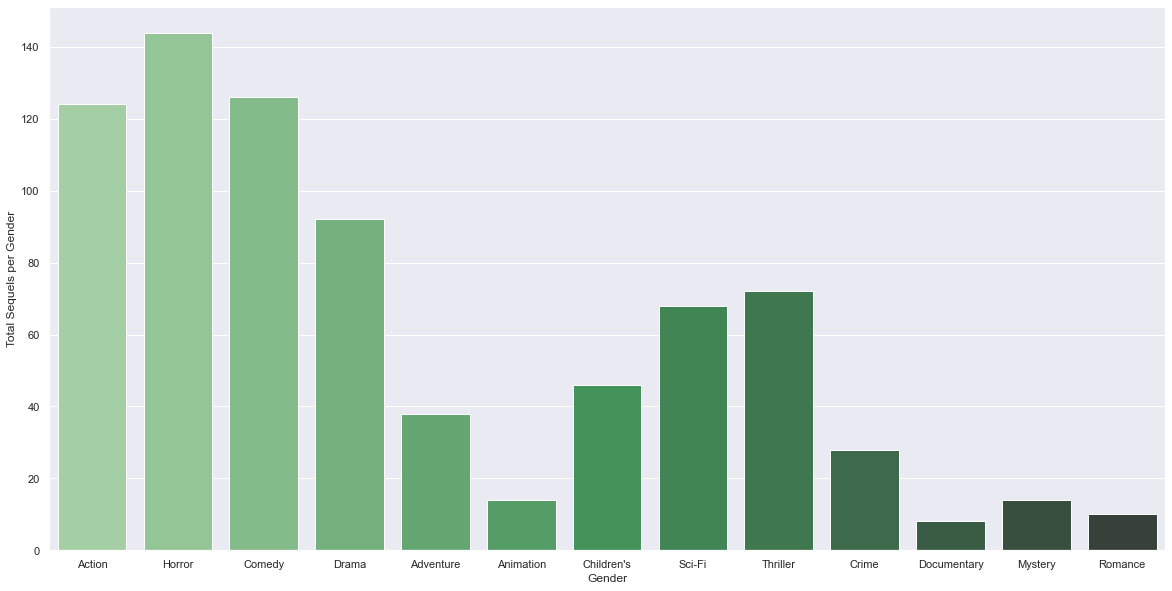

In [237]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="Gender", y="Total Sequels per Gender", data=df8, palette="Greens_d")
plt.show()

En aquesta gràfica tenim el total de sequeles per gènere. Com que algunes sequeles tenen més d'un gènere, el recompte total de sequeles per gènere (784) surt més alt que el recompte total de sequeles en si (237). Veiem que el gènere més repetit és horror  i el menys documentary.